In [127]:
# importar las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
# usar la libreria collections para encontrar el valor mas alto
from collections import Counter

In [131]:
# uso de base de datos
path = "/home/luii/Documents/Modelacionysimulacion"
file = "LAB2Python/gastos2021.csv"
data = pd.read_csv(path + "/" + file)
data

,meses,tran_luis,comi_luis,ropa_luis,ocio_luis,tran_benj,comi_benj,ropa_benj,ocio_benj
0,enero,50,60,100,60,50,20,10,80
1,febrero,200,60,200,30,60,30,15,150
2,marzo,300,60,150,50,70,20,10,120
3,abril,300,60,20,100,80,15,5,130
4,mayo,400,60,50,150,50,20,15,150


## Función suma de tipo de gastos

In [96]:
# funcion para sumas gastos en un tipo de gasto (suma de columnas)

def suma_gas(tipo):
    suma = 0
    for i in tipo:
        suma += i
    return suma

# N1. Tabla gastos de cada miembro

In [84]:
# Tabla gastos Luis

subgastos = data.iloc[:, 0:1]
gastosluis = data.loc[: , ["tran_luis", "comi_luis", "ropa_luis", "ocio_luis"]]
datos1 = pd.concat([subgastos, gastosluis], axis=1)
datos1

,meses,tran_luis,comi_luis,ropa_luis,ocio_luis
0,enero,50,60,100,60
1,febrero,200,60,200,30
2,marzo,300,60,150,50
3,abril,300,60,20,100
4,mayo,400,60,50,150


In [102]:
# Tabla Gastos Benjamyn

subgastos = data.iloc[:, 0:1]
gastosbenj = data.loc[: , ["tran_benj", "comi_benj", "ropa_benj", "ocio_benj"]]
datos2 = pd.concat([subgastos, gastosbenj], axis=1)
datos2

,meses,tran_benj,comi_benj,ropa_benj,ocio_benj
0,enero,50,20,10,80
1,febrero,60,30,15,150
2,marzo,70,20,10,120
3,abril,80,15,5,130
4,mayo,50,20,15,150


# N2. Tipo de gastos


In [92]:
# tipos de gatos

categoria = data.columns.values.tolist()
del(categoria[0])
print("tipos de gastos = ", categoria)

tipos de gastos =  ['tran_luis', 'comi_luis', 'ropa_luis', 'ocio_luis', 'tran_benj', 'comi_benj', 'ropa_benj', 'ocio_benj']


## Mayores gastos

In [126]:
# mayores gastos Luis

# diccionario de los datos
tot_luis = {'transporte':suma_gas(datos1["tran_luis"]), 'comida':suma_gas(datos1["comi_luis"]), 'ropa':suma_gas(datos1["ropa_luis"]), 'ocio':suma_gas(datos1["ocio_luis"])}
        
k = Counter(tot_luis)
high = k.most_common(3)
print("3 tipos que más gastos tiene Luis: ", high)

3 tipos que más gastos tiene Luis:  [('transporte', 1250), ('ropa', 520), ('ocio', 390)]


In [130]:
# mayores gastos Benja

# diccionario de los datos
tot_benja = {'transporte':suma_gas(datos2["tran_benj"]), 'comida':suma_gas(datos2["comi_benj"]), 'ropa':suma_gas(datos2["ropa_benj"]), 'ocio':suma_gas(datos2["ocio_benj"])}
        
k = Counter(tot_benja)
high = k.most_common(3)
print("3 tipos que más gastos tiene Benja: ", high)

3 tipos que más gastos tiene Benja:  [('ocio', 630), ('transporte', 310), ('comida', 105)]


# N4. Gráfica de total de gastos 2021

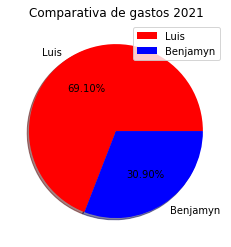

In [134]:
# suma total de gastos Luis en el 2021
suma_total_luis = suma_gas(datos1["tran_luis"]) + suma_gas(datos1["comi_luis"]) + suma_gas(datos1["ropa_luis"]) + suma_gas(datos1["ocio_luis"])
# suma total de gastos Luis en el 2021
suma_total_benja = suma_gas(datos2["tran_benj"]) + suma_gas(datos2["comi_benj"]) + suma_gas(datos2["ropa_benj"]) + suma_gas(datos2["ocio_benj"])

# nombre
nombre = ['Luis', 'Benjamyn']
# gastos
gastos = [suma_total_luis, suma_total_benja]
# color
color = ['r', 'b']

# creacion del pie
plt.pie(gastos, labels=nombre, colors=color, shadow=True, autopct="%1.2f%%")
plt.legend()
plt.title("Comparativa de gastos 2021")
plt.show()